# Proceso ETL del csv - Patadas
---

## Primera fase: Exploración del dataset y limpieza

### Importación de librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from google.colab import drive

### Carga del dataset

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo CSV en Google Drive
csv_path = '/content/drive/MyDrive/Inteligencia Artificial Avanzada/DataSets/patadas.csv'

# Cargar el archivo CSV en un DataFrame de pandas
try:
    df = pd.read_csv(csv_path)
    print("Archivo CSV cargado exitosamente.")
    # Muestra las primeras filas del DataFrame
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {csv_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Mounted at /content/drive
Archivo CSV cargado exitosamente.


,Número del animal,DEL,Hora Inicio Ordeño,Ubre,DI,DD,TI,TD,MDI,Media OCC en los últimos 7 días,...,TD.5,RCS (x 1000),Fecha RCS,DI.6,DD.6,TI.6,TD.6,Fecha CMT,Notas,Fecha de Notas
0,1554,158,18/07/2025 07:53 a. m.,6,0,6,0,0,2.8,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8771,4,18/07/2025 04:17 a. m.,6,2,0,0,0,2.6,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6178,264,17/07/2025 11:59 p. m.,6,0,0,6,0,2.4,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2076,354,18/07/2025 06:08 a. m.,3,0,0,0,0,1.5,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1624,335,18/07/2025 08:13 a. m.,1,0,0,0,0,1.5,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,Sensor de rumia: 7635826,05/07/2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Número del animal                37 non-null     int64  
 1   DEL                              37 non-null     int64  
 2   Hora Inicio Ordeño               37 non-null     object 
 3   Ubre                             37 non-null     int64  
 4   DI                               37 non-null     int64  
 5   DD                               37 non-null     int64  
 6   TI                               37 non-null     int64  
 7   TD                               37 non-null     int64  
 8   MDI                              36 non-null     float64
 9   Media OCC en los últimos 7 días  0 non-null      float64
 10  Última OCC (x 1000)              0 non-null      float64
 11  MI>12                            37 non-null     int64  
 12  Media Interv. Ordeño    

In [ ]:
# Display the dimensions of the original DataFrame
print("Dimensiones del dataset original:")
print(df.shape)

Dimensiones del dataset original:
(37, 43)


### Eliminación de columnas con más del 50% de sus datos nulos

In [ ]:
# Identify columns with missing values and calculate percentages
missing_percentages = df.isnull().sum() / len(df) * 100

# Determine a threshold (e.g., drop columns with more than 50% missing values)
threshold = 50

# Get the list of columns to drop
columns_to_drop = missing_percentages[missing_percentages > threshold].index.tolist()

# Drop columns
df_dropped = df.drop(columns=columns_to_drop)

# Display remaining columns (header)
print("Columnas restantes después de dropear:")
print(df_dropped.columns.tolist())

# Display the DataFrame after dropping columns
display(df_dropped.head())

Columnas restantes después de dropear:
['Número del animal', 'DEL', 'Hora Inicio Ordeño', 'Ubre', 'DI', 'DD', 'TI', 'TD', 'MDI', 'MI>12', 'Media Interv. Ordeño', 'Éxito IO (h)', 'DI.1', 'DD.1', 'TI.1', 'TD.1', 'DI.2', 'DD.2', 'TI.2', 'TD.2', 'DI.3', 'DD.3', 'TI.3', 'TD.3', 'DI.4', 'DD.4', 'TI.4', 'TD.4', 'DI.5', 'DD.5', 'TI.5', 'TD.5', 'RCS (x 1000)']


,Número del animal,DEL,Hora Inicio Ordeño,Ubre,DI,DD,TI,TD,MDI,MI>12,...,TD.3,DI.4,DD.4,TI.4,TD.4,DI.5,DD.5,TI.5,TD.5,RCS (x 1000)
0,1554,158,18/07/2025 07:53 a. m.,6,0,6,0,0,2.8,0,...,2,5.4,6.8,5.4,5.6,0,0,0.0,0.0,0
1,8771,4,18/07/2025 04:17 a. m.,6,2,0,0,0,2.6,4,...,1,5.1,5.0,4.7,4.1,1296,786,588.0,0.0,0
2,6178,264,17/07/2025 11:59 p. m.,6,0,0,6,0,2.4,5,...,0,5.0,0.0,5.9,4.7,0,0,0.0,0.0,0
3,2076,354,18/07/2025 06:08 a. m.,3,0,0,0,0,1.5,4,...,4,5.3,5.0,5.3,5.6,0,0,0.0,0.0,0
4,1624,335,18/07/2025 08:13 a. m.,1,0,0,0,0,1.5,2,...,0,5.0,5.4,5.3,5.7,0,0,0.0,0.0,0


### Tipo de dato de cada columna

In [ ]:
# Check the data types of each column
print("Tipo de dato de cada columna:")
print(df_dropped.dtypes)

Tipo de dato de cada columna:
Número del animal         int64
DEL                       int64
Hora Inicio Ordeño       object
Ubre                      int64
DI                        int64
DD                        int64
TI                        int64
TD                        int64
MDI                     float64
MI>12                     int64
Media Interv. Ordeño     object
Éxito IO (h)            float64
DI.1                      int64
DD.1                      int64
TI.1                      int64
TD.1                      int64
DI.2                      int64
DD.2                      int64
TI.2                      int64
TD.2                      int64
DI.3                      int64
DD.3                      int64
TI.3                      int64
TD.3                      int64
DI.4                    float64
DD.4                    float64
TI.4                    float64
TD.4                    float64
DI.5                      int64
DD.5                      int64
TI.5      

### Numero de datos nulos por columna

In [ ]:
# Count the number of null values in each column
null_counts = df_dropped.isnull().sum()

# Print the null counts
print("Número de registros nulos por columna:")
print(null_counts)

Número de registros nulos por columna:
Número del animal       0
DEL                     0
Hora Inicio Ordeño      0
Ubre                    0
DI                      0
DD                      0
TI                      0
TD                      0
MDI                     1
MI>12                   0
Media Interv. Ordeño    1
Éxito IO (h)            1
DI.1                    0
DD.1                    0
TI.1                    0
TD.1                    0
DI.2                    0
DD.2                    0
TI.2                    0
TD.2                    0
DI.3                    0
DD.3                    0
TI.3                    0
TD.3                    0
DI.4                    0
DD.4                    0
TI.4                    1
TD.4                    1
DI.5                    0
DD.5                    0
TI.5                    1
TD.5                    1
RCS (x 1000)            0
dtype: int64


### Eliminamos columnas que todos sus valores sean 0. Creamos un nuevo dataframe
---

In [ ]:
# List of columns to drop
columns_to_drop_explicit = ['Media OCC en los últimos 7 días', 'Última OCC (x 1000)', 'RCS (x 1000)', 'Fecha RCS', 'DI.6', 'DD.6', 'TI.6', 'TD.6', 'Fecha CMT', 'Notas', 'Fecha de Notas', 'TD']

# Drop the specified columns from the original DataFrame to create a new one
df_cleaned = df.drop(columns=columns_to_drop_explicit)

# Display the head of the new DataFrame
print("Columnas restantes después de dropear explícitamente:")
print(df_cleaned.columns.tolist())
display(df_cleaned.head())

Columnas restantes después de dropear explícitamente:
['Número del animal', 'DEL', 'Hora Inicio Ordeño', 'Ubre', 'DI', 'DD', 'TI', 'MDI', 'MI>12', 'Media Interv. Ordeño', 'Éxito IO (h)', 'DI.1', 'DD.1', 'TI.1', 'TD.1', 'DI.2', 'DD.2', 'TI.2', 'TD.2', 'DI.3', 'DD.3', 'TI.3', 'TD.3', 'DI.4', 'DD.4', 'TI.4', 'TD.4', 'DI.5', 'DD.5', 'TI.5', 'TD.5']


,Número del animal,DEL,Hora Inicio Ordeño,Ubre,DI,DD,TI,MDI,MI>12,Media Interv. Ordeño,...,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4,DI.5,DD.5,TI.5,TD.5
0,1554,158,18/07/2025 07:53 a. m.,6,0,6,0,2.8,0,09:06,...,0,2,5.4,6.8,5.4,5.6,0,0,0.0,0.0
1,8771,4,18/07/2025 04:17 a. m.,6,2,0,0,2.6,4,14:00,...,0,1,5.1,5.0,4.7,4.1,1296,786,588.0,0.0
2,6178,264,17/07/2025 11:59 p. m.,6,0,0,6,2.4,5,13:05,...,1,0,5.0,0.0,5.9,4.7,0,0,0.0,0.0
3,2076,354,18/07/2025 06:08 a. m.,3,0,0,0,1.5,4,10:52,...,3,4,5.3,5.0,5.3,5.6,0,0,0.0,0.0
4,1624,335,18/07/2025 08:13 a. m.,1,0,0,0,1.5,2,10:37,...,1,0,5.0,5.4,5.3,5.7,0,0,0.0,0.0


### Histograma de todas las columnas

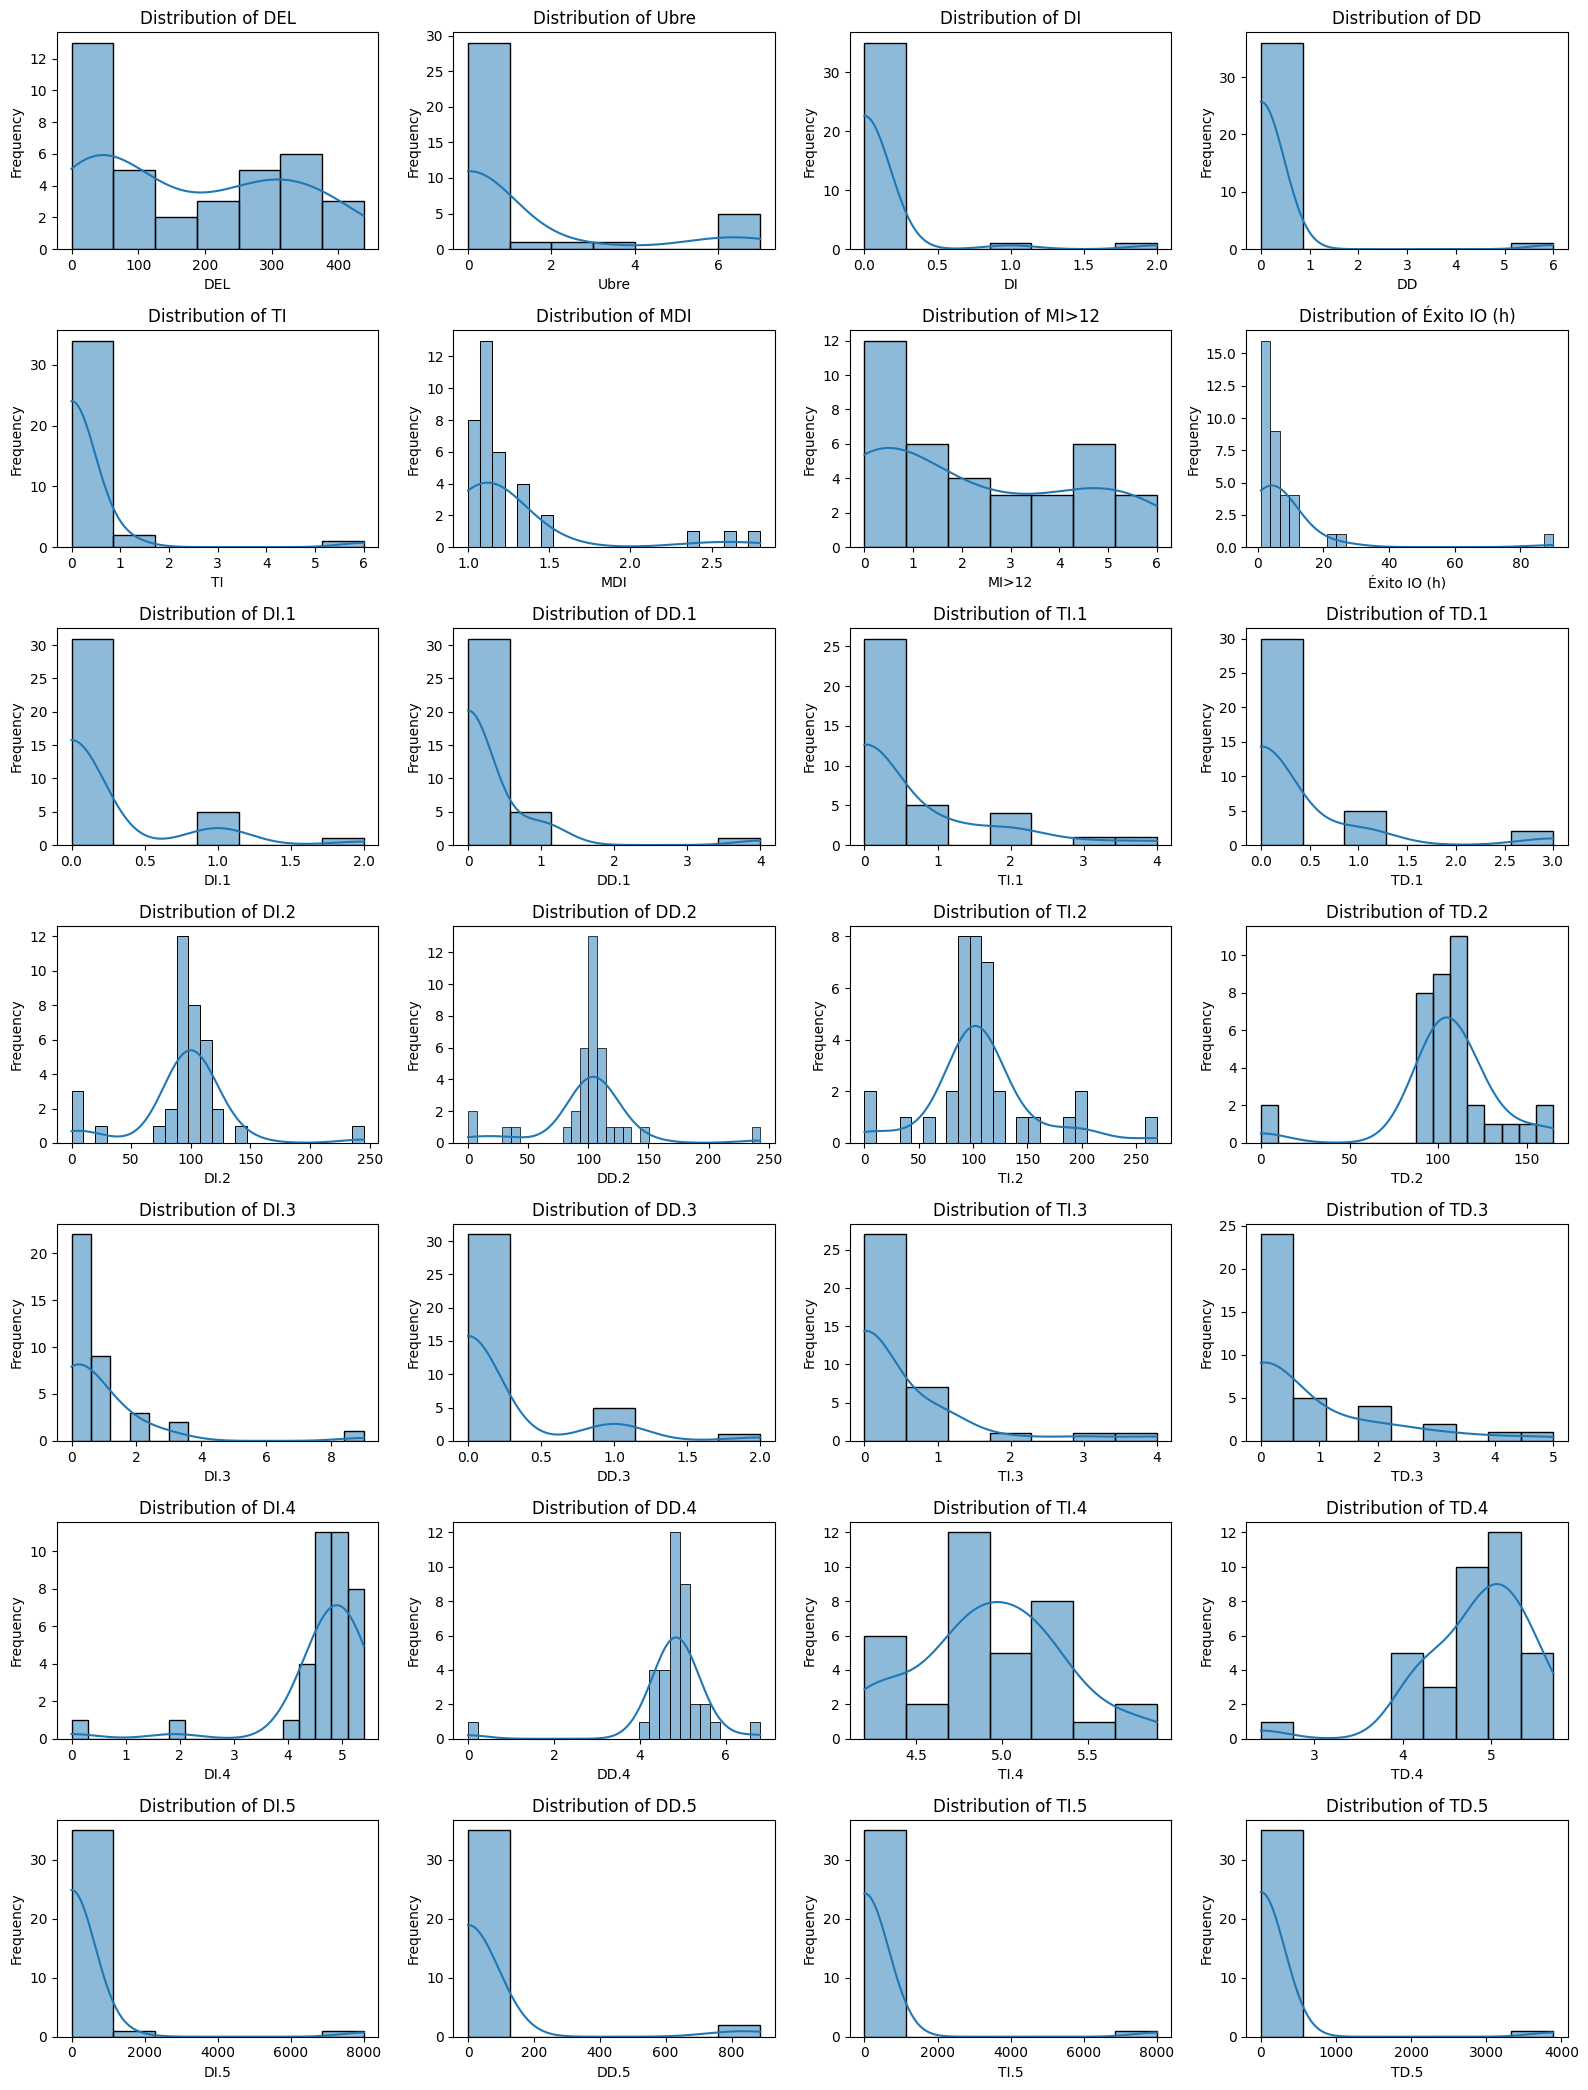

In [ ]:
# Get the list of columns from df_cleaned
columns_to_visualize = df_cleaned.columns.tolist()

# Exclude date-related columns and identifier columns
columns_to_exclude = ['Número del animal', 'Hora Inicio Ordeño', 'Media Interv. Ordeño']
columns_to_visualize = [col for col in columns_to_visualize if col not in columns_to_exclude]

# Calculate the number of rows and columns for subplots
n_cols = 4  # You can adjust the number of columns as needed
n_rows = (len(columns_to_visualize) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(columns_to_visualize):
    if i < len(axes): # Ensure we don't go out of bounds if there are more columns than subplots
        if df_cleaned[col].dtype in ['int64', 'float64']:
            # For numerical columns, use a histogram
            sns.histplot(df_cleaned[col].dropna(), kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
        else:
            # For other types (likely discrete/categorical), use a bar plot
            sns.countplot(x=col, data=df_cleaned, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Calculate and print the mean of each numerical column
print("Media de cada columna numérica:")
print(df_cleaned.select_dtypes(include=np.number).mean())

Media de cada columna numérica:
Número del animal    5135.702703
DEL                   175.864865
Ubre                    1.027027
DI                      0.081081
DD                      0.162162
TI                      0.216216
MDI                     1.263889
MI>12                   2.243243
Éxito IO (h)            7.888889
DI.1                    0.189189
DD.1                    0.243243
TI.1                    0.540541
TD.1                    0.297297
DI.2                   95.135135
DD.2                   99.891892
TI.2                  108.351351
TD.2                  105.108108
DI.3                    0.810811
DD.3                    0.189189
TI.3                    0.432432
TD.3                    0.756757
DI.4                    4.664865
DD.4                    4.770270
TI.4                    4.927778
TD.4                    4.844444
DI.5                  251.162162
DD.5                   45.216216
TI.5                  238.333333
TD.5                  108.055556
dtype: floa

## Segunda Fase: Exploración del dataset Limpiado
---


##

### Mapa de calor con valores faltantes en cada columna

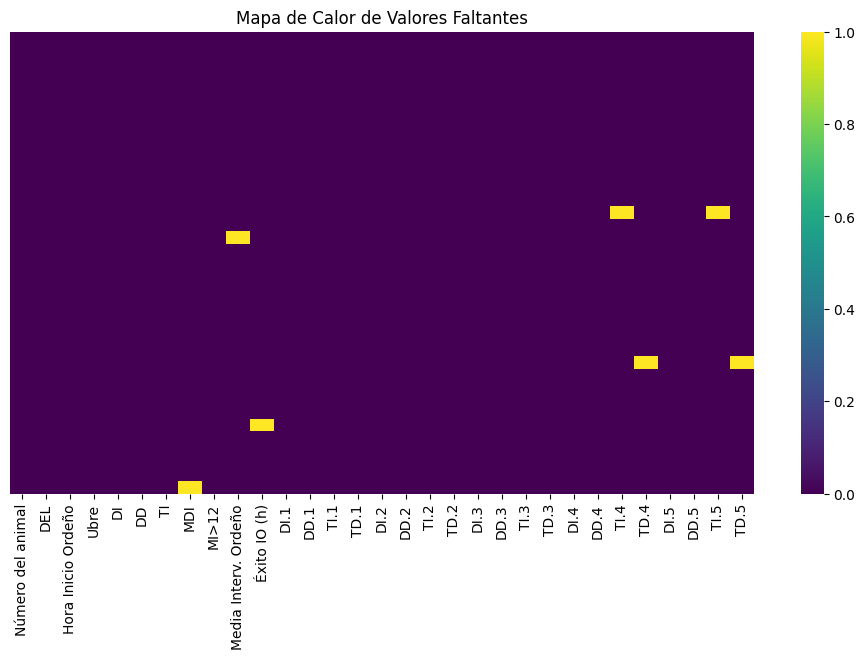

Porcentaje de missing por columna%:
Éxito IO (h)            2.702703
Media Interv. Ordeño    2.702703
MDI                     2.702703
TD.4                    2.702703
TI.4                    2.702703
TI.5                    2.702703
TD.5                    2.702703
dtype: float64


In [ ]:
# Mapa de calor de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

# Porcentaje de missing por columna
missing_summary = (df_cleaned.isnull().sum() / len(df_cleaned) * 100).sort_values(ascending=False)
print("Porcentaje de missing por columna%:")
print(missing_summary[missing_summary > 0])

### Estadistica descriptiva básica
---

In [ ]:
# Resumen estadístico completo
print("Estadísticas descriptivas:")
display(df_cleaned.describe(include='all'))

# Para variables categóricas específicas
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nFrecuencias de {col}:")
    print(df_cleaned[col].value_counts())

Estadísticas descriptivas:


,Número del animal,DEL,Hora Inicio Ordeño,Ubre,DI,DD,TI,MDI,MI>12,Media Interv. Ordeño,...,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4,DI.5,DD.5,TI.5,TD.5
count,37.000000,37.000000,37,37.000000,37.000000,37.000000,37.000000,36.000000,37.000000,36,...,37.000000,37.000000,37.000000,37.000000,36.000000,36.000000,37.000000,37.000000,36.000000,36.000000
unique,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,18/07/2025 07:53 a. m.,NaN,NaN,NaN,NaN,NaN,NaN,10:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5135.702703,175.864865,NaN,1.027027,0.081081,0.162162,0.216216,1.263889,2.243243,NaN,...,0.432432,0.756757,4.664865,4.770270,4.927778,4.844444,251.162162,45.216216,238.333333,108.055556
std,3214.962172,145.060363,NaN,2.242103,0.363500,0.986394,1.003747,0.430384,2.165454,NaN,...,0.898781,1.278137,0.984383,0.929117,0.417893,0.629033,1325.996219,192.131196,1332.804862,648.333333
min,1204.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,4.200000,2.400000,0.000000,0.000000,0.000000,0.000000
25%,1634.000000,34.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.100000,0.000000,NaN,...,0.000000,0.000000,4.600000,4.600000,4.700000,4.550000,0.000000,0.000000,0.000000,0.000000
50%,6178.000000,158.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.100000,2.000000,NaN,...,0.000000,0.000000,4.900000,4.800000,4.900000,4.900000,0.000000,0.000000,0.000000,0.000000
75%,8732.000000,302.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.225000,4.000000,NaN,...,1.000000,1.000000,5.100000,5.000000,5.200000,5.225000,0.000000,0.000000,0.000000,0.000000



Frecuencias de Hora Inicio Ordeño:
Hora Inicio Ordeño
18/07/2025 07:53 a. m.    1
18/07/2025 04:17 a. m.    1
17/07/2025 11:59 p. m.    1
18/07/2025 06:08 a. m.    1
18/07/2025 08:13 a. m.    1
18/07/2025 08:00 a. m.    1
18/07/2025 10:14 a. m.    1
18/07/2025 12:52 a. m.    1
18/07/2025 08:19 a. m.    1
18/07/2025 06:37 a. m.    1
18/07/2025 08:47 a. m.    1
18/07/2025 06:46 a. m.    1
18/07/2025 07:29 a. m.    1
18/07/2025 12:46 a. m.    1
18/07/2025 05:36 a. m.    1
18/07/2025 09:53 a. m.    1
18/07/2025 09:25 a. m.    1
18/07/2025 01:33 a. m.    1
18/07/2025 08:26 a. m.    1
18/07/2025 09:45 a. m.    1
18/07/2025 04:01 a. m.    1
18/07/2025 06:17 a. m.    1
18/07/2025 06:59 a. m.    1
18/07/2025 05:47 a. m.    1
18/07/2025 09:09 a. m.    1
18/07/2025 08:06 a. m.    1
18/07/2025 05:27 a. m.    1
18/07/2025 07:37 a. m.    1
18/07/2025 09:38 a. m.    1
18/07/2025 06:53 a. m.    1
18/07/2025 01:13 a. m.    1
18/07/2025 06:25 a. m.    1
18/07/2025 10:05 a. m.    1
17/07/2025 11:08 p. m

### Mapa de correlaciones
---

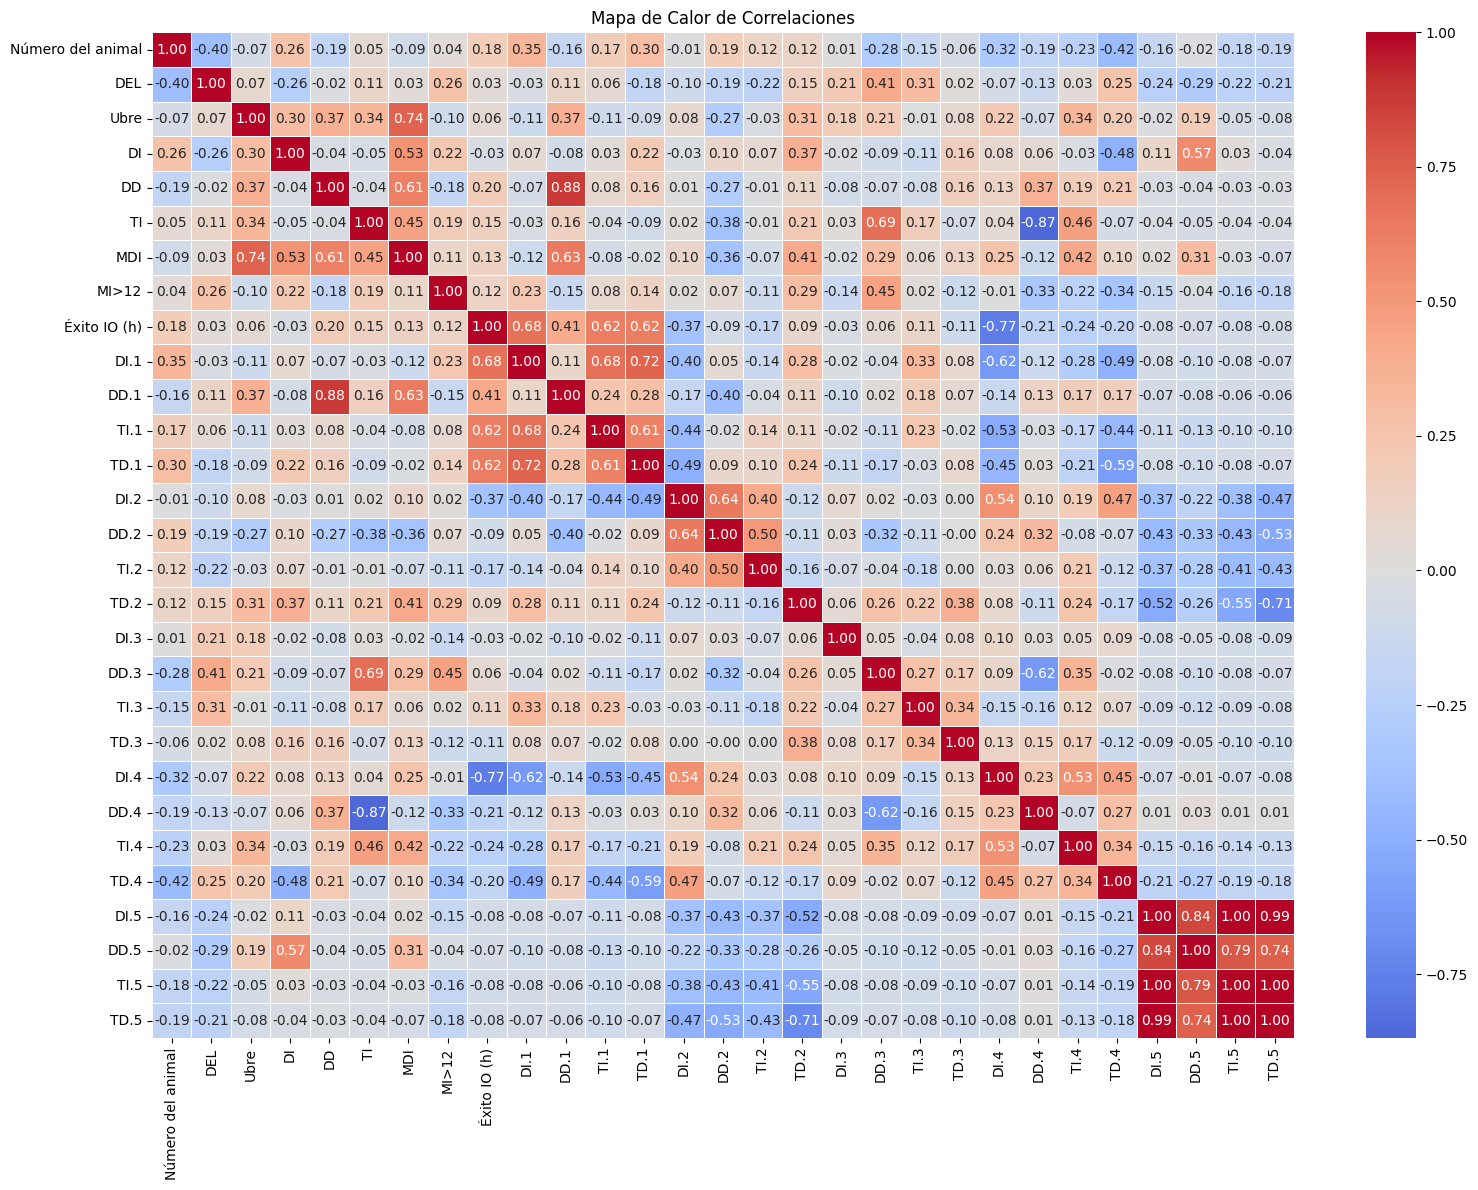

Top 10 correlaciones positivas:
TI.5  TD.5    0.997295
TD.5  TI.5    0.997295
TI.5  DI.5    0.996151
DI.5  TI.5    0.996151
      TD.5    0.987014
TD.5  DI.5    0.987014
DD.1  DD      0.878130
DD    DD.1    0.878130
DD.5  DI.5    0.838659
DI.5  DD.5    0.838659
dtype: float64

Top 10 correlaciones negativas:
DI.1          DI.4           -0.620535
DI.4          DI.1           -0.620535
DD.3          DD.4           -0.621047
DD.4          DD.3           -0.621047
TD.5          TD.2           -0.705637
TD.2          TD.5           -0.705637
DI.4          Éxito IO (h)   -0.765145
Éxito IO (h)  DI.4           -0.765145
DD.4          TI             -0.868606
TI            DD.4           -0.868606
dtype: float64


In [ ]:
# Mapa de calor de correlaciones (solo variables numéricas)
plt.figure(figsize=(16, 12))
correlation_matrix = df_cleaned.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()

# Top correlaciones (positivas y negativas)
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
print("Top 10 correlaciones positivas:")
print(corr_pairs[corr_pairs < 1].head(10))
print("\nTop 10 correlaciones negativas:")
print(corr_pairs.tail(10))

# Proceso ETL del csv - Datos de Ordeña

In [ ]:
df_cleaned.head()

,Número del animal,DEL,Hora Inicio Ordeño,Ubre,DI,DD,TI,MDI,MI>12,Media Interv. Ordeño,...,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4,DI.5,DD.5,TI.5,TD.5
0,1554,158,18/07/2025 07:53 a. m.,6,0,6,0,2.8,0,09:06,...,0,2,5.4,6.8,5.4,5.6,0,0,0.0,0.0
1,8771,4,18/07/2025 04:17 a. m.,6,2,0,0,2.6,4,14:00,...,0,1,5.1,5.0,4.7,4.1,1296,786,588.0,0.0
2,6178,264,17/07/2025 11:59 p. m.,6,0,0,6,2.4,5,13:05,...,1,0,5.0,0.0,5.9,4.7,0,0,0.0,0.0
3,2076,354,18/07/2025 06:08 a. m.,3,0,0,0,1.5,4,10:52,...,3,4,5.3,5.0,5.3,5.6,0,0,0.0,0.0
4,1624,335,18/07/2025 08:13 a. m.,1,0,0,0,1.5,2,10:37,...,1,0,5.0,5.4,5.3,5.7,0,0,0.0,0.0


In [ ]:
df_cleaned['Hora Inicio Ordeño'] = df_cleaned['Hora Inicio Ordeño'].astype(str)

df_cleaned.head()

,Número del animal,DEL,Hora Inicio Ordeño,Ubre,DI,DD,TI,MDI,MI>12,Media Interv. Ordeño,...,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4,DI.5,DD.5,TI.5,TD.5
0,1554,158,18/07/2025 07:53 a. m.,6,0,6,0,2.8,0,09:06,...,0,2,5.4,6.8,5.4,5.6,0,0,0.0,0.0
1,8771,4,18/07/2025 04:17 a. m.,6,2,0,0,2.6,4,14:00,...,0,1,5.1,5.0,4.7,4.1,1296,786,588.0,0.0
2,6178,264,17/07/2025 11:59 p. m.,6,0,0,6,2.4,5,13:05,...,1,0,5.0,0.0,5.9,4.7,0,0,0.0,0.0
3,2076,354,18/07/2025 06:08 a. m.,3,0,0,0,1.5,4,10:52,...,3,4,5.3,5.0,5.3,5.6,0,0,0.0,0.0
4,1624,335,18/07/2025 08:13 a. m.,1,0,0,0,1.5,2,10:37,...,1,0,5.0,5.4,5.3,5.7,0,0,0.0,0.0


In [ ]:
# Primero, normalizar los textos "a. m." y "p. m." a un formato que pandas pueda entender
df_cleaned['Hora Inicio Ordeño'] = df_cleaned['Hora Inicio Ordeño'].str.replace('a. m.', 'AM', regex=False)
df_cleaned['Hora Inicio Ordeño'] = df_cleaned['Hora Inicio Ordeño'].str.replace('p. m.', 'PM', regex=False)

# Opción 1: Convertir a datetime con formato específico y dayfirst=True
df_cleaned['Hora Inicio Ordeño'] = pd.to_datetime(df_cleaned['Hora Inicio Ordeño'],
                                              format='%d/%m/%Y %I:%M %p',
                                              errors='coerce')

# Verificar si hay values nulos después de la conversión
print("Valores nulos después de la conversión:", df_cleaned['Hora Inicio Ordeño'].isnull().sum())

# Crear nuevas columnas de Fecha y Hora
df_cleaned['Fecha_ordeño'] = df_cleaned['Hora Inicio Ordeño'].dt.date
df_cleaned['Hora_inicio_ordeño'] = df_cleaned['Hora Inicio Ordeño'].dt.time

# Mostrar el resultado
print(df_cleaned[['Hora Inicio Ordeño', 'Fecha_ordeño', 'Hora_inicio_ordeño']].head())

# Opcional: eliminar la columna original si ya no la necesitas
# df_cleaned = df_cleaned.drop('Hora de inicio', axis=1)

Valores nulos después de la conversión: 0
   Hora Inicio Ordeño Fecha_ordeño Hora_inicio_ordeño
0 2025-07-18 07:53:00   2025-07-18           07:53:00
1 2025-07-18 04:17:00   2025-07-18           04:17:00
2 2025-07-17 23:59:00   2025-07-17           23:59:00
3 2025-07-18 06:08:00   2025-07-18           06:08:00
4 2025-07-18 08:13:00   2025-07-18           08:13:00


In [ ]:
columnas = columnas = ['Hora Inicio Ordeño', 'Fecha_ordeño', 'Hora_inicio_ordeño'] + [col for col in df_cleaned.columns if col not in ['Fecha', 'Hora_inicio', 'Hora de inicio']]
df_cleaned = df_cleaned[columnas]

In [ ]:
df_cleaned.head()

,Hora Inicio Ordeño,Fecha_ordeño,Hora_inicio_ordeño,Número del animal,DEL,Hora Inicio Ordeño,Ubre,DI,DD,TI,...,DI.4,DD.4,TI.4,TD.4,DI.5,DD.5,TI.5,TD.5,Fecha_ordeño,Hora_inicio_ordeño
0,2025-07-18 07:53:00,2025-07-18,07:53:00,1554,158,2025-07-18 07:53:00,6,0,6,0,...,5.4,6.8,5.4,5.6,0,0,0.0,0.0,2025-07-18,07:53:00
1,2025-07-18 04:17:00,2025-07-18,04:17:00,8771,4,2025-07-18 04:17:00,6,2,0,0,...,5.1,5.0,4.7,4.1,1296,786,588.0,0.0,2025-07-18,04:17:00
2,2025-07-17 23:59:00,2025-07-17,23:59:00,6178,264,2025-07-17 23:59:00,6,0,0,6,...,5.0,0.0,5.9,4.7,0,0,0.0,0.0,2025-07-17,23:59:00
3,2025-07-18 06:08:00,2025-07-18,06:08:00,2076,354,2025-07-18 06:08:00,3,0,0,0,...,5.3,5.0,5.3,5.6,0,0,0.0,0.0,2025-07-18,06:08:00
4,2025-07-18 08:13:00,2025-07-18,08:13:00,1624,335,2025-07-18 08:13:00,1,0,0,0,...,5.0,5.4,5.3,5.7,0,0,0.0,0.0,2025-07-18,08:13:00


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Hora Inicio Ordeño    37 non-null     datetime64[ns]
 1   Fecha_ordeño          37 non-null     object        
 2   Hora_inicio_ordeño    37 non-null     object        
 3   Número del animal     37 non-null     int64         
 4   DEL                   37 non-null     int64         
 5   Hora Inicio Ordeño    37 non-null     datetime64[ns]
 6   Ubre                  37 non-null     int64         
 7   DI                    37 non-null     int64         
 8   DD                    37 non-null     int64         
 9   TI                    37 non-null     int64         
 10  MDI                   36 non-null     float64       
 11  MI>12                 37 non-null     int64         
 12  Media Interv. Ordeño  36 non-null     object        
 13  Éxito IO (h)          

## One-Hot encoding

In [ ]:
# Convertir la columna a numérica (coerciona texto no convertible a NaN)
df_cleaned['Media Interv. Ordeño'] = pd.to_numeric(df_cleaned['Media Interv. Ordeño'], errors='coerce')

# Imputar con 0 los NaN restantes
df_cleaned['Media Interv. Ordeño'] = df_cleaned['Media Interv. Ordeño'].fillna(0)

# Verificar
print(df_cleaned['Media Interv. Ordeño'].isnull().sum())



0


In [ ]:
# Identify numerical columns with missing values (excluding the boolean dummy variables)
numerical_cols_with_missing = df_cleaned.select_dtypes(include=np.number).columns[df_cleaned.select_dtypes(include=np.number).isnull().any()].tolist()

# Impute missing values in numerical columns with 0
df_imputed = df_cleaned.copy()
for col in numerical_cols_with_missing:
    df_imputed[col] = df_imputed[col].fillna(0)

print("Missing values after imputation:")
print(df_imputed.isnull().sum()[df_imputed.isnull().sum() > 0])

Missing values after imputation:
Series([], dtype: int64)


In [ ]:
df_imputed['DEL'].unique()


array([158,   4, 264, 354, 335, 359,  89,  42, 396, 302, 329, 372, 180,
       438, 419, 100,   0,  20,   5, 255,  36,  34,  22, 226,  30, 292,
        10,  14,  88,  61,  90, 250, 298, 189, 323,  95,  28])

In [ ]:
# Revisar qué columnas numéricas tenían NaN antes de imputar
cols_with_missing = numerical_cols_with_missing

# Crear un resumen binario: 1 = tenía NaN, 0 = no tenía
missing_matrix = df_cleaned[cols_with_missing].isnull().astype(int)
missing_matrix['DEL'] = df_cleaned['DEL']

# Filtrar solo los IDs con imputaciones
missing_summary = missing_matrix.groupby('DEL').sum()

print("Columnas imputadas por cada DEL:")
display(missing_summary)


Columnas imputadas por cada DEL:


,MDI,Éxito IO (h),TI.4,TD.4,TI.5,TD.5
DEL,,,,,,
0,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
10,0,0,0,1,0,1
14,0,0,0,0,0,0
20,0,0,0,0,0,0
22,0,0,0,0,0,0
28,1,0,0,0,0,0
30,0,0,0,0,0,0


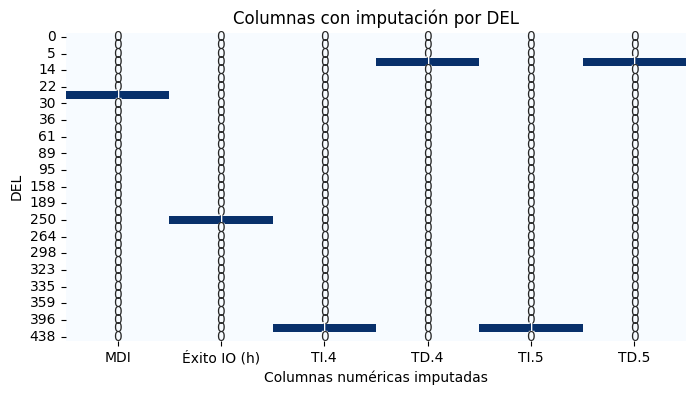

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.heatmap(missing_summary, cmap='Blues', cbar=False, annot=True)
plt.title("Columnas con imputación por DEL")
plt.xlabel("Columnas numéricas imputadas")
plt.ylabel("DEL")
plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Seleccionar columnas numéricas (ya imputadas)
num_cols = df_imputed.select_dtypes(include='number').columns.drop('DEL')

# Identify rows with imputed values
rows_with_imputed_values = df_cleaned[numerical_cols_with_missing].isnull().any(axis=1)

# Calcular similitud coseno entre los DEL imputados
similarities = pd.DataFrame(
    cosine_similarity(df_imputed.loc[rows_with_imputed_values, num_cols]),
    index=df_imputed.loc[rows_with_imputed_values, 'DEL'],
    columns=df_imputed.loc[rows_with_imputed_values, 'DEL']
)

print("Matriz de similitud entre DELs con valores imputados:")
display(similarities)

Matriz de similitud entre DELs con valores imputados:


DEL,419,10,250,28
DEL,,,,
419,1.000000,0.998397,0.999633,0.999765
10,0.998397,1.000000,0.998181,0.998585
250,0.999633,0.998181,1.000000,0.999877
28,0.999765,0.998585,0.999877,1.000000


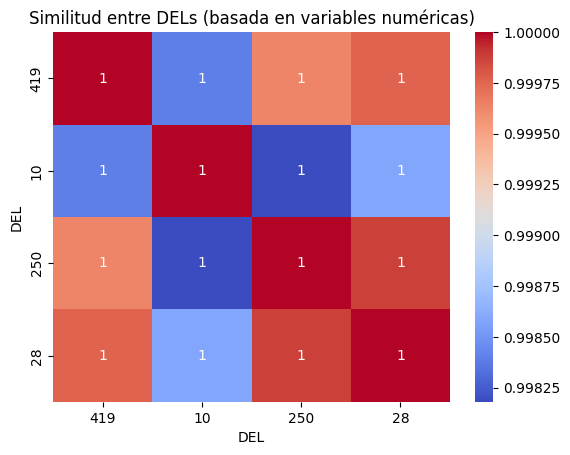

In [ ]:
sns.heatmap(similarities, annot=True, cmap='coolwarm')
plt.title('Similitud entre DELs (basada en variables numéricas)')
plt.show()


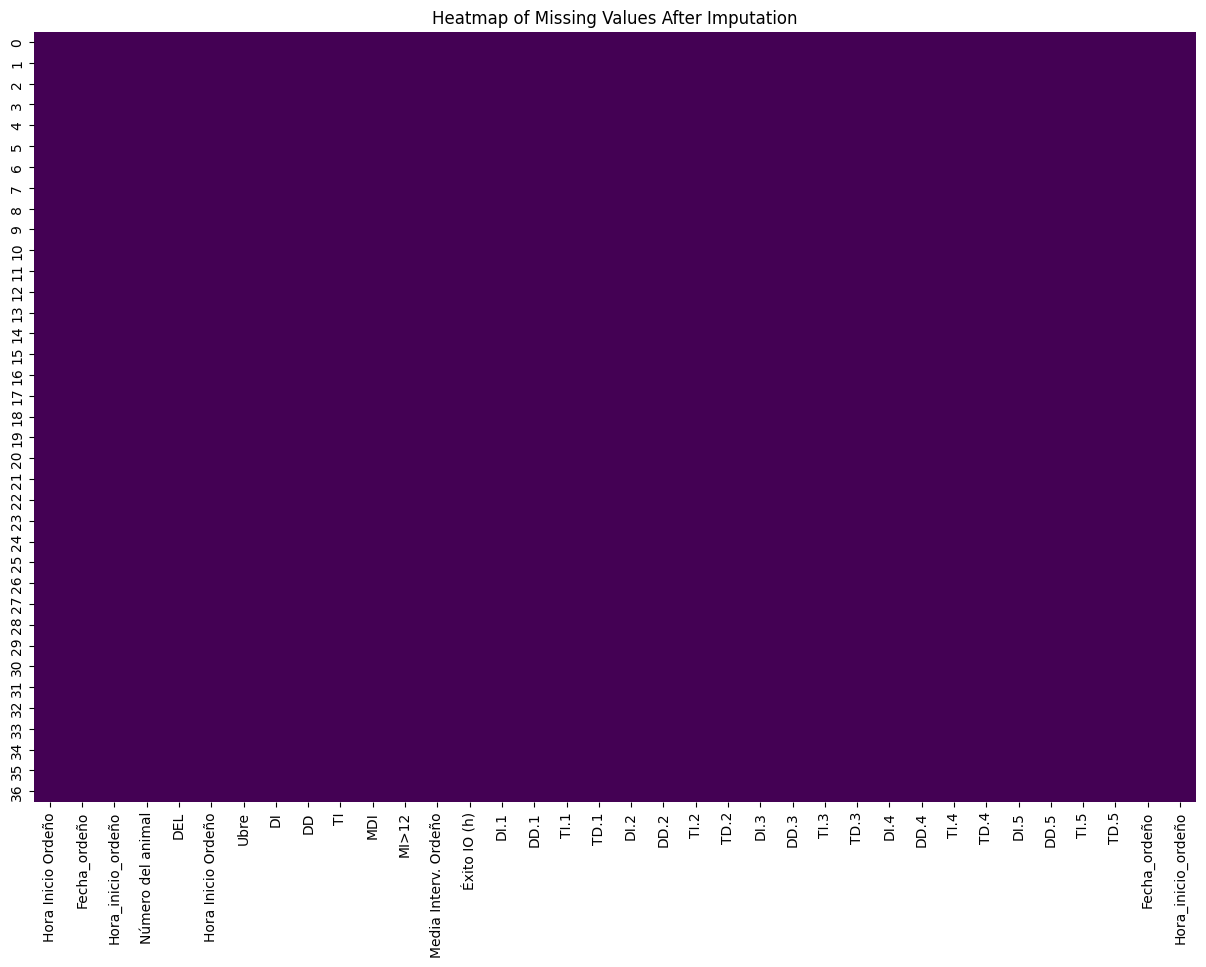

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_imputed.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values After Imputation')
plt.show()

In [ ]:
# Save the DataFrame to a CSV file
df_imputed.to_csv('df_imputed.csv', index=False)

print("DataFrame saved to df_imputed.csv")

DataFrame saved to df_imputed.csv


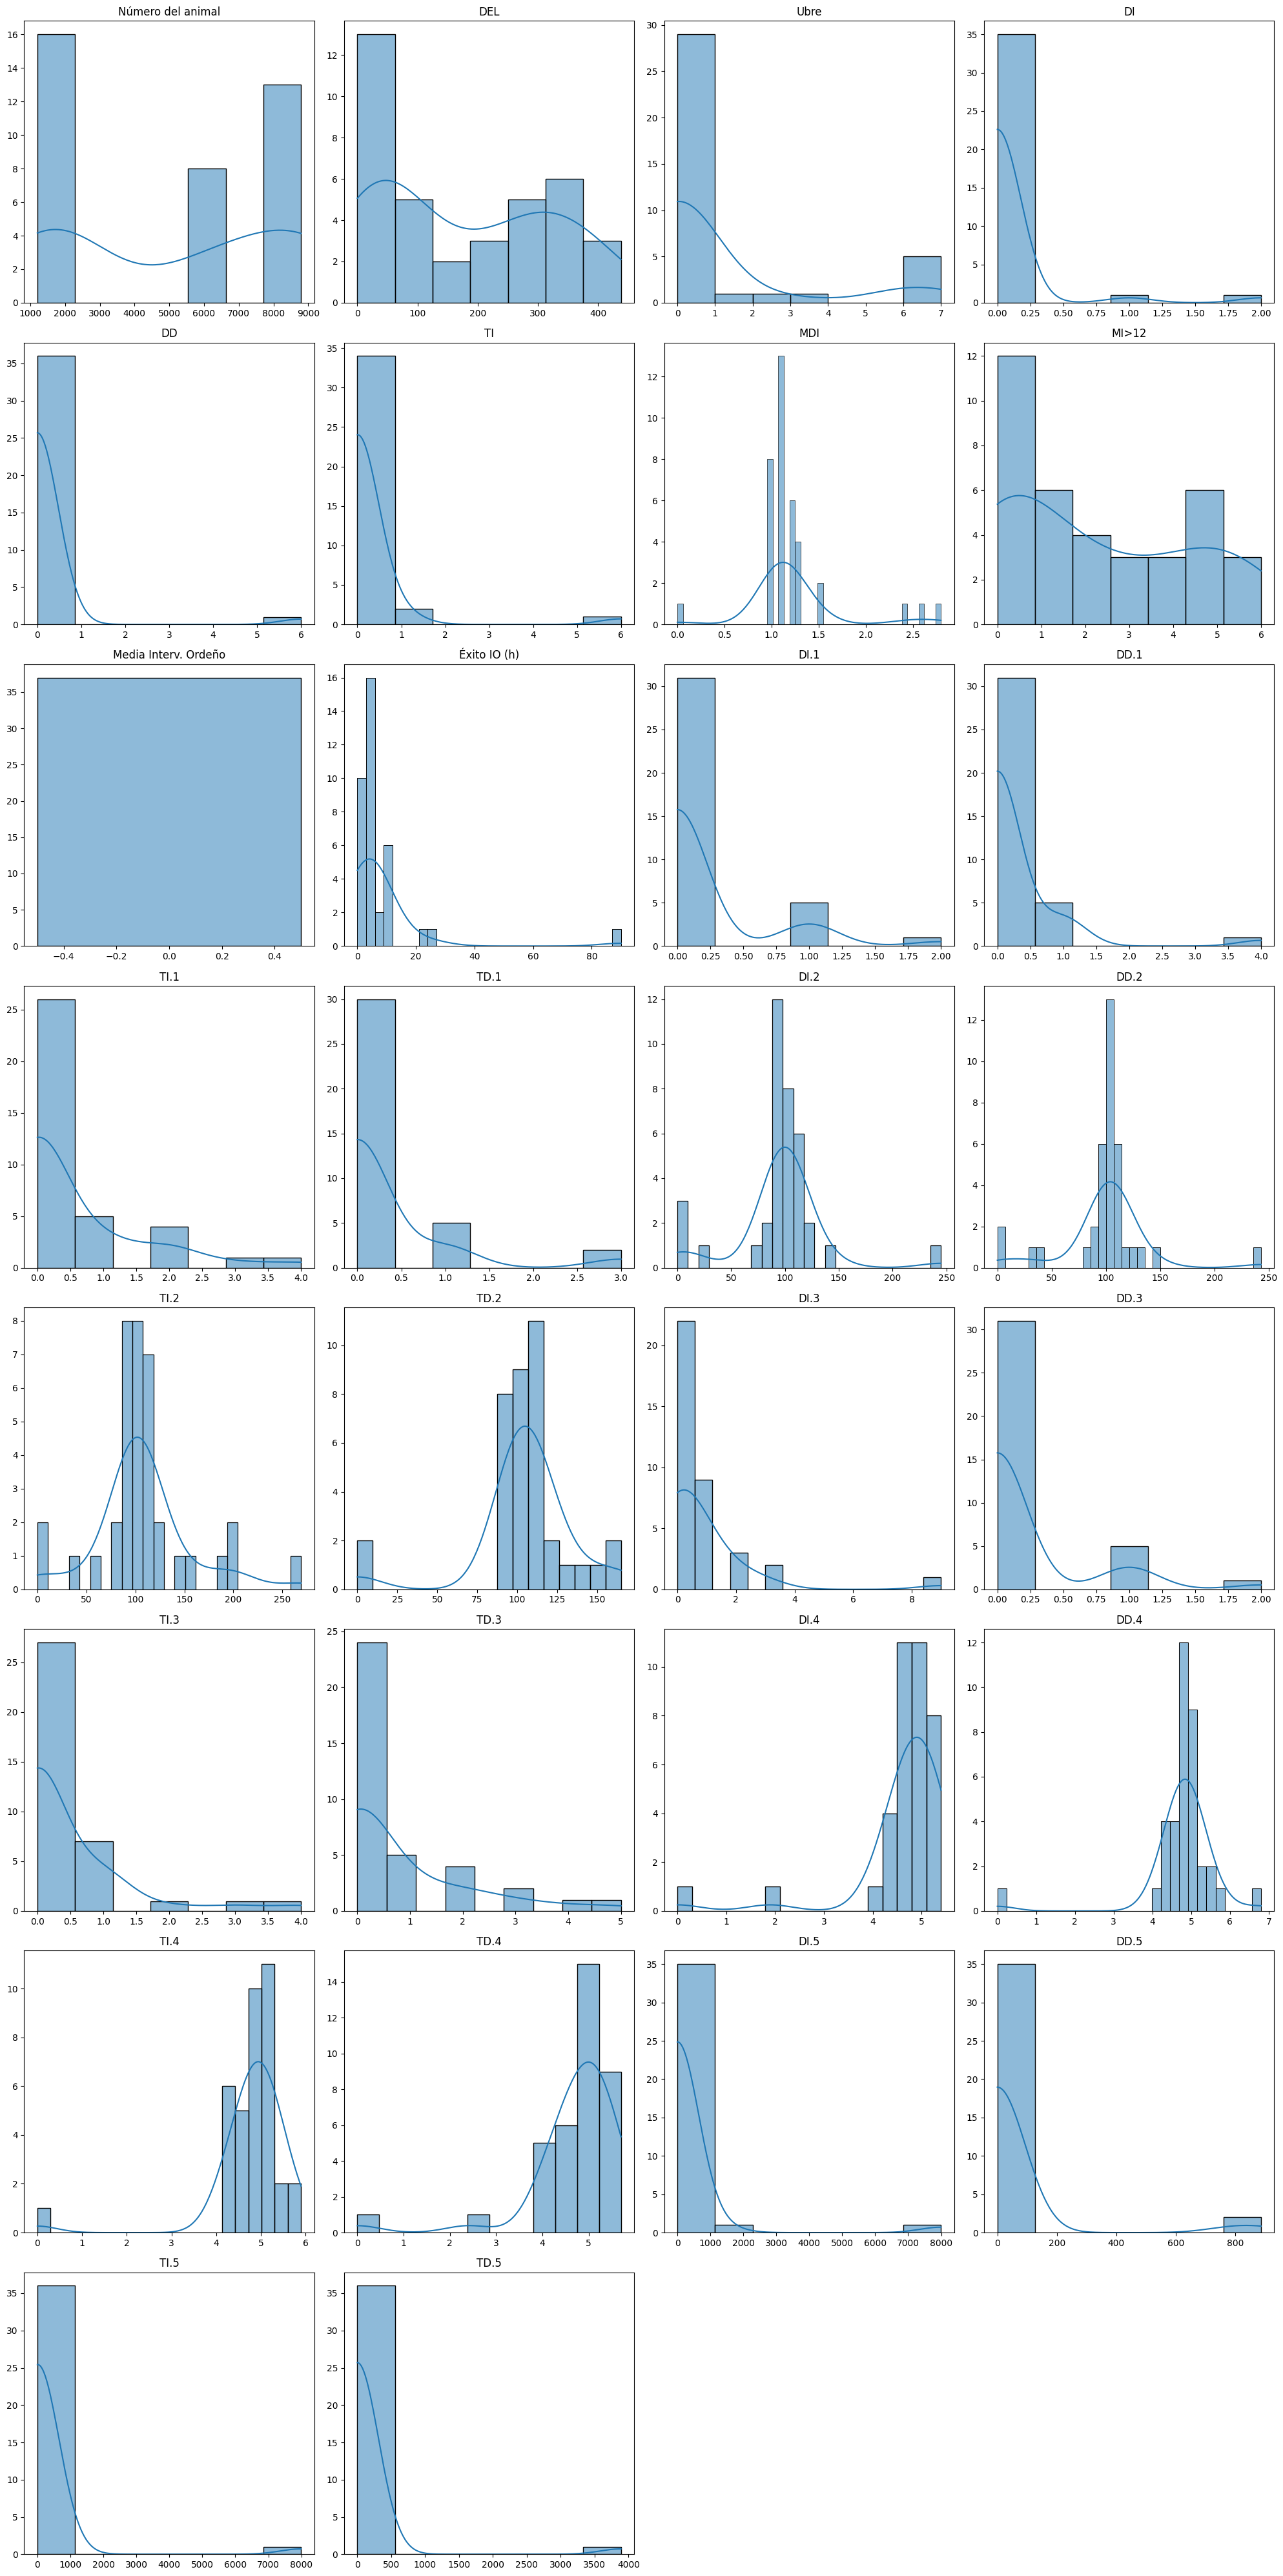

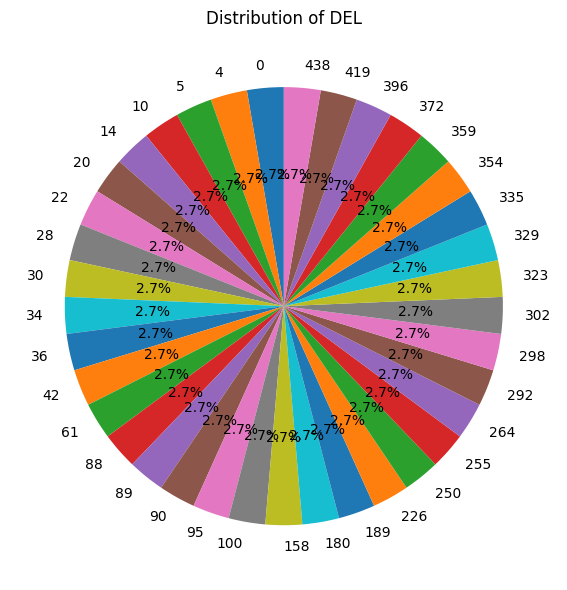

In [ ]:
# Select only numerical columns (excluding the newly created dummy variables)
numerical_cols_for_hist = df_imputed.select_dtypes(include=np.number).columns.tolist()

# Determine the number of rows and columns for the subplots
n_cols = 4
n_rows = (len(numerical_cols_for_hist) + n_cols - 1) // n_cols

# Create histograms for the selected numerical columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols_for_hist):
    sns.histplot(df_imputed[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create pie charts for 'DEL'

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Convert 'DEL' to categorical type for the pie chart
df_imputed['DEL'] = df_imputed['DEL'].astype('category')

# Pie chart for 'DEL'
numero_ordeno_counts = df_imputed['DEL'].value_counts(dropna=False)
ax.pie(numero_ordeno_counts, labels=numero_ordeno_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of DEL')

plt.tight_layout()
plt.show()